<a href="https://colab.research.google.com/github/Derrick-Majani/Marketing_Campaign/blob/main/Marketing_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Business Context

'All You Need' Supermarket is planning for the year-end sale. They want to launch a new offer - gold membership, that gives a 20% discount on all purchases, for only \$499 which is \$999 on other days. It will be valid only for existing customers and the campaign through phone calls is currently being planned for them. The upper management are a firm believer in the power of data and feels that the best way to reduce the cost of the campaign is to make a predictive model which will classify customers who might purchase the offer. The predictive model will be built using the data gathered during last year's campaign.

### Objective
The supermarket wants to predict the likelihood of the customer giving a positive response and wants to identify the different factors which affect the customer's response. As a data scientist at this supermarket, you need to analyze the data provided to identify these factors and then build a prediction model to predict the probability of a customer will give a positive response. Also, in order to ensure the model achieves the best performance, the model performance has to be improved using hyperparameter tuning and by preventing data leakage. Finally, pipelines have to be used to make the model production ready.

### Data Description

- Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
- ID - Unique ID of each customer
- Year_Birth - Age of the customer
- Complain - 1 if the customer complained in the last 2 years
- Dt_Customer - date of customer's enrollment with the company
- Education - customer's level of education
- Marital - customer's marital status
- Kidhome - number of small children in customer's household
- Teenhome - number of teenagers in customer's household
- Income - customer's yearly household income
- MntFishProducts - the amount spent on fish products in the last 2 years
- MntMeatProducts - the amount spent on meat products in the last 2 years
- MntFruits - the amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - the amount spent on wine products in the last 2 years
- MntGoldProds - the amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through the company's website
- NumWebVisitsMonth - number of visits to company's website in the last month
- Recency - number of days since the last purchase


## Import and Load Data

In [91]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import io
import os
import sys
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

In [2]:
# Use Local drives to upload the csv on google colab
from google.colab import files
uploaded = files.upload()

Saving marketing_data.xlsx to marketing_data.xlsx


In [92]:
df =pd.read_excel(io.BytesIO(uploaded['marketing_data.xlsx']))
df.sample(n=5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
1705,6856,1979,Graduation,Together,21645.0,1,0,2012-03-09 00:00:00,75,14,...,4,5,19,3,3,0,3,9,1,0
1280,4500,1991,PhD,Together,68682.0,0,0,2013-06-10 00:00:00,56,919,...,99,30,45,1,4,9,10,2,0,0
1789,10936,1965,Graduation,Married,72190.0,0,0,2/13/13,79,597,...,172,166,249,1,5,6,4,3,0,0
1219,3900,1972,Graduation,Married,65685.0,0,1,3/29/14,54,642,...,0,7,57,1,9,2,9,5,0,0
333,9213,1970,Graduation,Widow,31880.0,1,0,10/31/12,13,4,...,2,0,3,1,1,0,2,8,0,0


In [93]:
df.shape

(2240, 22)

In [94]:
df.duplicated().sum()

0

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [96]:

# Assuming 'data' is the name of your DataFrame
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Verify the updated column data type
print(df['Dt_Customer'].dtype)


datetime64[ns]


In [97]:
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

## Statistical Summary

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [99]:
# let's view the statistical summary of the non-numerical columns in the data
df.describe(include=np.number).T.style.highlight_min(color="lightgreen", axis=0)

,count,mean,std,min,25%,50%,75%,max
ID,2240.000000,5592.159821,3246.662198,0.000000,2828.250000,5458.500000,8427.750000,11191.000000
Year_Birth,2240.000000,1968.805804,11.984069,1893.000000,1959.000000,1970.000000,1977.000000,1996.000000
Income,2216.000000,52247.251354,25173.076661,1730.000000,35303.000000,51381.500000,68522.000000,666666.000000
Kidhome,2240.000000,0.444196,0.538398,0.000000,0.000000,0.000000,1.000000,2.000000
Teenhome,2240.000000,0.506250,0.544538,0.000000,0.000000,0.000000,1.000000,2.000000
Recency,2240.000000,49.109375,28.962453,0.000000,24.000000,49.000000,74.000000,99.000000
MntWines,2240.000000,303.935714,336.597393,0.000000,23.750000,173.500000,504.250000,1493.000000
MntFruits,2240.000000,26.302232,39.773434,0.000000,1.000000,8.000000,33.000000,199.000000
MntMeatProducts,2240.000000,166.950000,225.715373,0.000000,16.000000,67.000000,232.000000,1725.000000
MntFishProducts,2240.000000,37.525446,54.628979,0.000000,3.000000,12.000000,50.000000,259.000000


In [100]:

# Select only object (non-numeric) columns
object_cols = df.select_dtypes(include='object')

# Calculate the statistical summary of the object columns
summary = object_cols.describe().T

# Apply the highlight_min method to the minimum values
styled_summary = summary.style.highlight_min(color='lightgreen', axis=0)

# Display the styled summary
styled_summary


,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864


## Missing Values

In [101]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(df)

,Total,Percent
Income,24,0.010714
ID,0,0.000000
MntFishProducts,0,0.000000
Response,0,0.000000
NumWebVisitsMonth,0,0.000000
NumStorePurchases,0,0.000000
NumCatalogPurchases,0,0.000000
NumWebPurchases,0,0.000000
NumDealsPurchases,0,0.000000
MntGoldProds,0,0.000000


## Feature Engineering

In [102]:
data = df.copy()

In [103]:
# Dropping column - ID
data.drop(columns=["ID"], inplace=True)

In [104]:

# Convert 'Year_Birth' to datetime
data['Year_Birth'] = pd.to_datetime(data['Year_Birth'], format='%Y')

# Calculate the age by subtracting 'Year_Birth' from the current year
current_year = pd.to_datetime('2023')
data['Age'] = current_year.year - data['Year_Birth'].dt.year

# Print the DataFrame to see the new 'Age' column
data


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1970-01-01,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,...,189,218,1,4,4,6,1,1,0,53
1,1961-01-01,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,...,0,37,1,7,3,7,5,1,0,62
2,1958-01-01,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,...,2,30,1,3,2,5,2,0,0,65
3,1967-01-01,Graduation,Together,32474.0,1,1,2014-11-05,0,10,0,...,0,0,1,1,0,2,7,0,0,56
4,1989-01-01,Graduation,Single,21474.0,1,0,2014-08-04,0,6,16,...,0,34,2,3,1,2,7,1,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976-01-01,PhD,Divorced,66476.0,0,1,2013-07-03,99,372,18,...,48,78,2,5,2,11,4,0,0,47
2236,1977-01-01,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,10,...,8,16,1,1,0,3,8,0,0,46
2237,1976-01-01,Graduation,Divorced,46310.0,1,0,2012-03-12,99,185,2,...,5,14,2,6,1,5,8,0,0,47
2238,1978-01-01,Graduation,Married,65819.0,0,0,2012-11-29,99,267,38,...,165,63,1,5,4,10,3,0,0,45


In [105]:
data['Age'] = data['Age'].astype(float)


In [106]:
data['Age'].to_numpy()


array([53., 62., 65., ..., 47., 45., 54.])

In [107]:
# let's view the statistical summary of the non-numerical columns in the data
data.describe(include=np.number).T.style.highlight_min(color="lightgreen", axis=0)

,count,mean,std,min,25%,50%,75%,max
Income,2216.000000,52247.251354,25173.076661,1730.000000,35303.000000,51381.500000,68522.000000,666666.000000
Kidhome,2240.000000,0.444196,0.538398,0.000000,0.000000,0.000000,1.000000,2.000000
Teenhome,2240.000000,0.506250,0.544538,0.000000,0.000000,0.000000,1.000000,2.000000
Recency,2240.000000,49.109375,28.962453,0.000000,24.000000,49.000000,74.000000,99.000000
MntWines,2240.000000,303.935714,336.597393,0.000000,23.750000,173.500000,504.250000,1493.000000
MntFruits,2240.000000,26.302232,39.773434,0.000000,1.000000,8.000000,33.000000,199.000000
MntMeatProducts,2240.000000,166.950000,225.715373,0.000000,16.000000,67.000000,232.000000,1725.000000
MntFishProducts,2240.000000,37.525446,54.628979,0.000000,3.000000,12.000000,50.000000,259.000000
MntSweetProducts,2240.000000,27.062946,41.280498,0.000000,1.000000,8.000000,33.000000,263.000000
MntGoldProds,2240.000000,44.021875,52.167439,0.000000,9.000000,24.000000,56.000000,362.000000


## Univariate Analysis

In [108]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="white"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

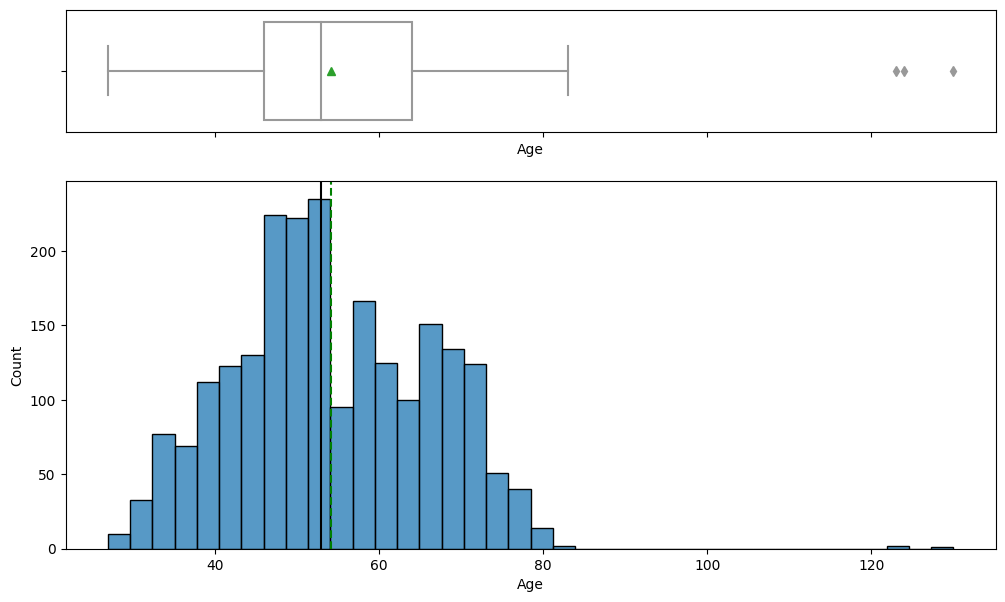

In [109]:
# Observations on V1
histogram_boxplot(data, "Age")

In [110]:
data[data["Age"] > 90]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
513,1893-01-01,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,...,0,2,1,1,0,2,4,0,0,130.0
827,1899-01-01,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,...,64,224,1,4,6,4,1,0,0,124.0
2233,1900-01-01,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,...,4,25,1,2,1,2,5,0,1,123.0


In [111]:
import numpy as np

data["Age"] = np.clip(data["Age"], None, 64)


In [112]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0
MntGoldProds,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0


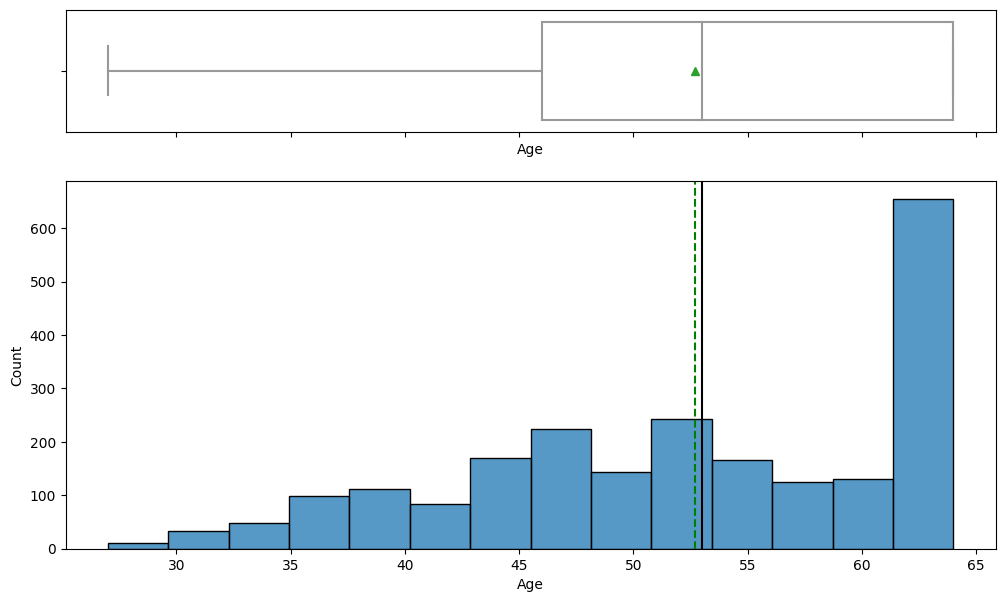

In [113]:
# Observations on V1
histogram_boxplot(data, "Age")

In [114]:
# Frequency tables for each categorical feature
for column in data.select_dtypes(include=['object']).columns:
    display(pd.crosstab(index=data[column], columns='% observations', normalize='columns'))

col_0,% observations
Education,
2n Cycle,0.090625
Basic,0.024107
Graduation,0.503125
Master,0.165179
PhD,0.216964


col_0,% observations
Marital_Status,
Absurd,0.000893
Alone,0.001339
Divorced,0.103571
Married,0.385714
Single,0.214286
Together,0.258929
Widow,0.034375
YOLO,0.000893


In [115]:
# Replacing 2n Cycle with Master
data["Education"] = data["Education"].replace("2n Cycle", "Master")

In [116]:
# Replacing YOLO, Alone, Absurd with single and Together with Married
data["Marital_Status"] = data["Marital_Status"].replace(
    ["YOLO", "Alone", "Absurd"], "Single"
)
data["Marital_Status"] = data["Marital_Status"].replace(["Together"], "Married")

In [117]:
# Frequency tables for each categorical feature
for column in data.select_dtypes(include=['object']).columns:
    display(pd.crosstab(index=data[column], columns='% observations', normalize='columns'))

col_0,% observations
Education,
Basic,0.024107
Graduation,0.503125
Master,0.255804
PhD,0.216964


col_0,% observations
Marital_Status,
Divorced,0.103571
Married,0.644643
Single,0.217411
Widow,0.034375


In [118]:
data["Total_Amount_Spent"] = data[
    [
        "MntWines",
        "MntFruits",
        "MntMeatProducts",
        "MntFishProducts",
        "MntSweetProducts",
        "MntGoldProds",
    ]
].sum(axis=1)

### Handling Income

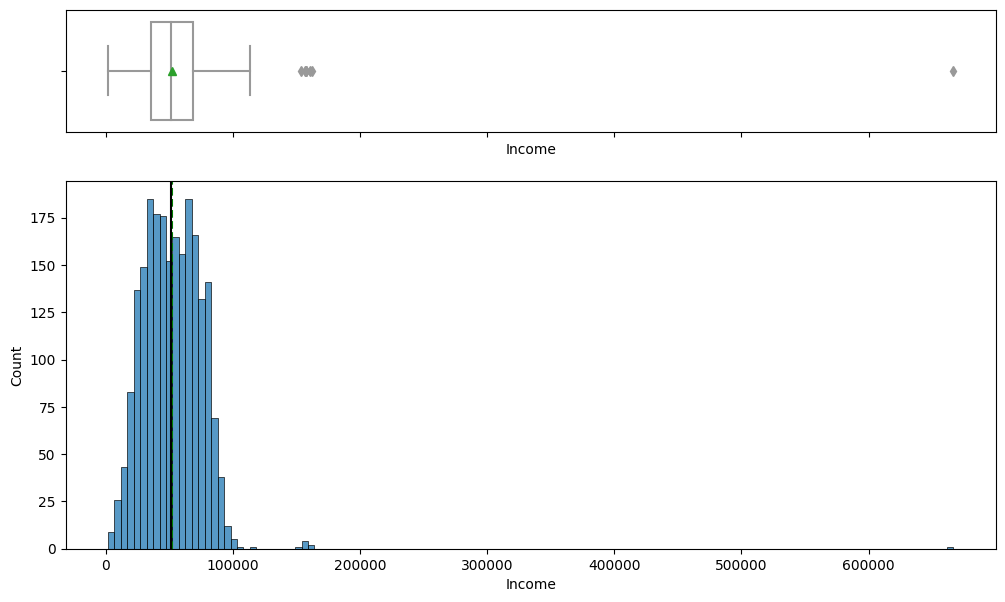

In [119]:
# Observations on V1
histogram_boxplot(data, "Income")

In [120]:
data[data["Income"] > 600000]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Total_Amount_Spent
527,1977-01-01,Graduation,Married,666666.0,1,0,2013-02-06,23,9,14,...,12,4,3,1,3,6,0,0,46.0,62


In [121]:
# Checking 10 largest values of amount spend on meat products
data.Income.nlargest(10)

527     666666.0
731     162397.0
497     160803.0
853     157733.0
2204    157243.0
325     157146.0
1925    156924.0
1826    153924.0
210     113734.0
832     105471.0
Name: Income, dtype: float64

In [122]:
import numpy as np

data["Income"] = np.clip(data["Income"], None, 162397)


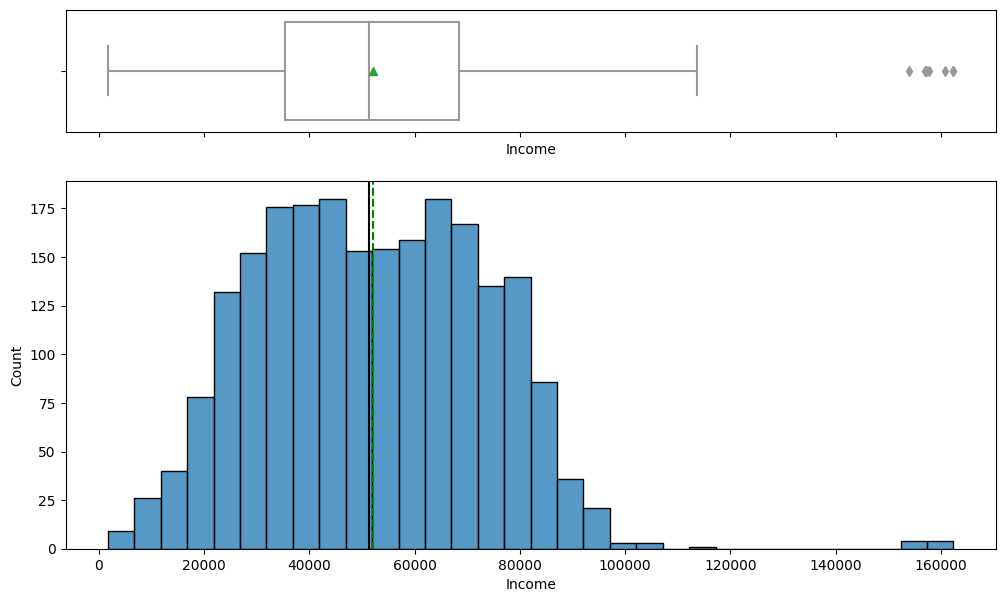

In [123]:
# Observations on V1
histogram_boxplot(data, "Income")

## Bivariate Analysis

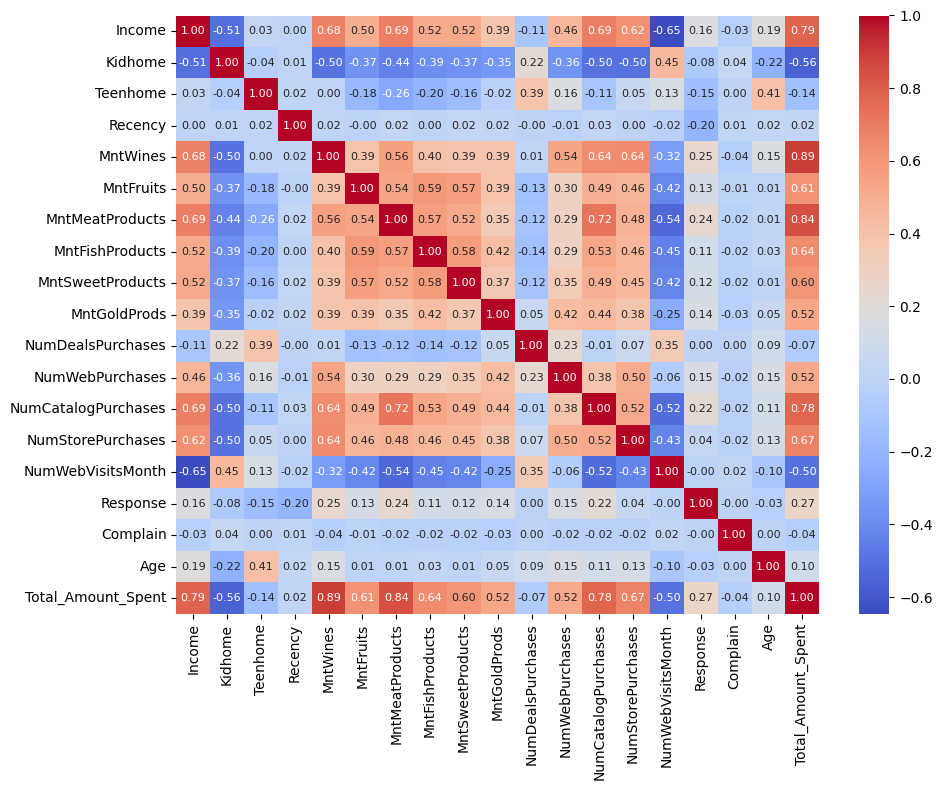

In [124]:
# Select only numerical columns
num_cols = data.select_dtypes(include=['float64', 'int64'])

# Create a correlation matrix
corr_matrix = num_cols.corr()

# Set the size of the figure
plt.figure(figsize=(10, 8))

# Plot the correlation matrix with adjusted font size
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', annot_kws={"fontsize": 8})

# Adjust the spacing between the heatmap cells
plt.tight_layout()

# Show the plot
plt.show()


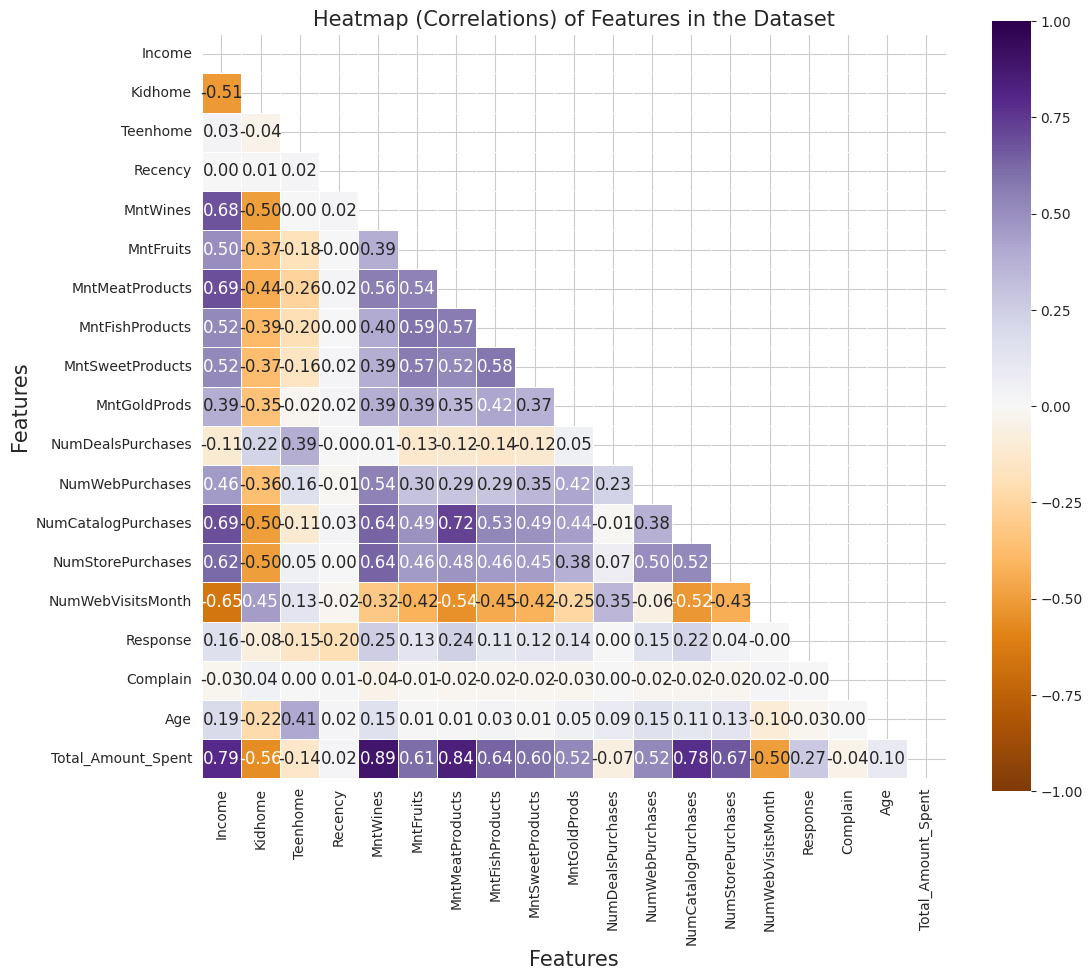

In [125]:
# Create a correlation for the dataset.
dataset_corr = data.corr().round(4)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Create a correlation matrix. Only bottom left corner valued.
mask = np.zeros_like(dataset_corr.round(4))
mask[np.triu_indices_from(mask)] = True

# Generate the corrleation matrix (heatmap) using Seaborn.
with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(dataset_corr.round(2), mask=mask, vmax=1, center = 0, vmin=-1, square=True, cmap='PuOr', linewidths=.5, annot=True, annot_kws={"size": 12}, fmt='.2f')
    plt.title('Heatmap (Correlations) of Features in the Dataset', fontsize=15)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Features', fontsize=15)
plt.show()


## Chi-Square

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   datetime64[ns]
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2216 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-nul

In [127]:
from scipy.stats import chi2_contingency
# Select the categorical columns to test
cat_cols = ['Marital_Status', 'Education']

# Create an empty dataframe for results
results_df = pd.DataFrame(columns=['Column 1', 'Column 2', 'Chi-Square', 'P-Value'])

# Loop through each column pair and perform chi-square test
for i, col1 in enumerate(cat_cols):
    for j, col2 in enumerate(cat_cols[i+1:]):
        contingency_table = pd.crosstab(data[col1], data[col2])
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        results_df = results_df.append({'Column 1': col1, 'Column 2': col2, 'Chi-Square': chi2, 'P-Value': p}, ignore_index=True)

# Print the results
results_df

,Column 1,Column 2,Chi-Square,P-Value
0,Marital_Status,Education,13.544883,0.139461


## Data Preparation for Modelling


In [128]:
data1 = data.copy()

In [129]:
# Separating features and the target column
X = data1.drop(["Response", "Year_Birth", "Dt_Customer", "Total_Amount_Spent"], axis=1)  # Drop the specified columns
y = data1["Response"]


In [130]:
X.shape

(2240, 19)

In [131]:
from sklearn.model_selection import train_test_split

# Split data into training and remaining data (validation + testing)
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.4, random_state=42)

# Split remaining data into validation and testing
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

# Print the sizes of each split
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 1344
Validation set size: 448
Testing set size: 448


## XGBoost Pipeline

In [132]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier


# Define the column transformer for preprocessing
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = ['Education', 'Marital_Status']

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', SimpleImputer(strategy='median'), numeric_features),
        ('categorical', OneHotEncoder(), categorical_features)
    ])

# Create the XGBoost classifier
xgb = XGBClassifier()

# Build the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', xgb)
])

# Fit the pipeline to the data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'C...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [133]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred_test = pipeline.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8392857142857143
Precision: 0.4807692307692308
Recall: 0.35714285714285715
F1 Score: 0.4098360655737705


## Random Forest Pipeline

In [134]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier


# Define the column transformer for preprocessing
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = ['Education', 'Marital_Status']

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', SimpleImputer(strategy='median'), numeric_features),
        ('categorical', OneHotEncoder(), categorical_features)
    ])

# Create the Random Forest classifier
rf = RandomForestClassifier()

# Build the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', rf)
])

# Fit the pipeline to the data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Age'],
      dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  ['Education',
                                                   'Marital_Status'])])),
                ('model', RandomForestClassifier())])

In [135]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred_test = pipeline.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8549107142857143
Precision: 0.5757575757575758
Recall: 0.2714285714285714
F1 Score: 0.3689320388349514


## Decision Tree Pipeline

In [136]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier


# Define the column transformer for preprocessing
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = ['Education', 'Marital_Status']

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', SimpleImputer(strategy='median'), numeric_features),
        ('categorical', OneHotEncoder(), categorical_features)
    ])

# Create the Decision Tree classifier
dt = DecisionTreeClassifier()

# Build the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', dt)
])

# Fit the pipeline to the data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Age'],
      dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  ['Education',
                                                   'Marital_Status'])])),
                ('model', DecisionTreeClassifier())])

In [137]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred_test = pipeline.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.78125
Precision: 0.32926829268292684
Recall: 0.38571428571428573
F1 Score: 0.35526315789473684


## Logistic Pipeline

In [138]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression


# Define the column transformer for preprocessing
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = ['Education', 'Marital_Status']

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', SimpleImputer(strategy='median'), numeric_features),
        ('categorical', OneHotEncoder(), categorical_features)
    ])

# Create the Logistic Regression classifier
logreg = LogisticRegression()

# Build the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', logreg)
])

# Fit the pipeline to the data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Age'],
      dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  ['Education',
                                                   'Marital_Status'])])),
                ('model', LogisticRegression())])

In [139]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred_test = pipeline.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8571428571428571
Precision: 0.65
Recall: 0.18571428571428572
F1 Score: 0.28888888888888886
